# references:
https://www.analyticsvidhya.com/blog/2018/11/introduction-text-summarization-textrank-python/

In [1]:
# import required libraries
#!conda install nltk
import numpy as np
import pandas as pd
import nltk
import re
import scipy.linalg as la
import matplotlib.pyplot as plt
%matplotlib inline

#import ssl
#ssl._create_default_https_context = ssl._create_unverified_context
#nltk.download('punkt')

In [3]:
with open('pride_and_prejudice.txt',encoding='utf-8', mode = 'r') as f:
#with open('Pride and Prejudice.txt','r') as f:
    full_txt = f.read().strip('\n').replace("\''","'")
    # clean the unnecessary txt
    full_txt = full_txt.replace('_','').replace('make by 拉米网（www.lami.fun）','') 

## Partition (chapters/paragraphs/sentences)

In [4]:
# chapter-wise
chapter_txt = full_txt.split('Chapter ')[1:] #len(chapter_txt)=61
cleaned_chapter = []
for chapter in chapter_txt:
    cleaned_chapter.append(chapter[1:].replace('\n',''))
len(cleaned_chapter)

61

In [5]:
cleaned_chapter[0]

'It is a truth universally acknowledged, that a single man in possession of a good fortune, must be in want of a wife.However little known the feelings or views of such a man may be on his first entering a neighbourhood, this truth is so well fixed in the minds of the surrounding families, that he is considered the rightful property of some one or other of their daughters."My dear Mr. Bennet," said his lady to him one day, "have you heard that Netherfield Park is let at last?"Mr. Bennet replied that he had not."But it is," returned she; "for Mrs. Long has just been here, and she told me all about it."Mr. Bennet made no answer."Do you not want to know who has taken it?" cried his wife impatiently."You want to tell me, and I have no objection to hearing it."This was invitation enough."Why, my dear, you must know, Mrs. Long says that Netherfield is taken by a young man of large fortune from the north of England; that he came down on Monday in a chaise and four to see the place, and was so

In [6]:
# paragraph-wise
cleaned_paragraph = []
for chapter in chapter_txt:
    para = [i for i in chapter.split('\n') if i != ""]
    cleaned_paragraph = cleaned_paragraph + para[1:]
len(cleaned_paragraph)

2063

In [5]:
# sentence-wise
cleaned_sentence = []
from nltk.tokenize import sent_tokenize
cleaned_sentence = [sent_tokenize(chapter) for chapter in chapter_txt]
cleaned_sentence = [x for y in cleaned_sentence for x in y]
len(cleaned_sentence)

5976

In [6]:
CHARACTER_LIST = [
    'Jane','Elizabeth','Catherine','Lydia', 'Georgiana','Caroline',
    'Darcy', 'Wickham', 'Bingley', 'Collins'
]
num_people = len(CHARACTER_LIST)

In [7]:
def find_interaction(sections):
    Characters = {}
    occurrence = []
    for person in CHARACTER_LIST:
        vector = []
        for section in sections:
            if person in section:
                vector.append(1)
            else:
                vector.append(0)
        occurrence.append(np.array(vector))
        Characters[person] = np.array(vector)

    occurrence_matrix = pd.DataFrame(occurrence) # num of people * num of sections 15*61
    co_occur = pd.DataFrame(np.dot(occurrence_matrix,occurrence_matrix.T))
    co_occur = co_occur / np.linalg.norm(co_occur, ord = 1, axis = 0)
    return co_occur, Characters

In [8]:
def text_rank(section_name, section):
    co_occur, Characters = find_interaction(section)
    P = co_occur
    alpha = 0.85
    P = alpha* co_occur + (1-alpha)*np.ones((num_people,num_people))/num_people

    # interation PageRank
    rank_inter = np.ones((num_people, 1))/num_people
    for i in range(100000):
        rank_inter = np.dot(P,rank_inter)
    rank_inter = rank_inter.reshape(-1,)

    text_rank = rank_inter[np.argsort(rank_inter)[::-1]].tolist()
    text_chara = [CHARACTER_LIST[i] for i in np.argsort(rank_inter)[::-1].tolist()]
    Characters_sort = sorted(Characters.items(), key=lambda x: sum(x[1]), reverse = True)
    occur_rank = [sum(character[1]) for character in Characters_sort]
    occur_chara = [character[0] for character in Characters_sort]
  
    rank_table = pd.DataFrame([text_chara, occur_chara]).T
    rank_table.columns = ['TextRank','Occurrence Rank']
    rank_table.index = np.arange(1,num_people+1).tolist()
    print(rank_table)
    
    x = np.arange(len(CHARACTER_LIST)).tolist()
    plt.bar(x, text_rank)
    plt.xticks(x, text_chara, rotation=50)
    plt.title(f'PageRank by {section_name} (Descending)')

    plt.show()

     TextRank Occurrence Rank
1   Elizabeth       Elizabeth
2       Darcy            Jane
3        Jane           Darcy
4     Bingley         Bingley
5     Wickham         Wickham
6     Collins           Lydia
7       Lydia         Collins
8   Catherine       Catherine
9   Georgiana       Georgiana
10   Caroline        Caroline


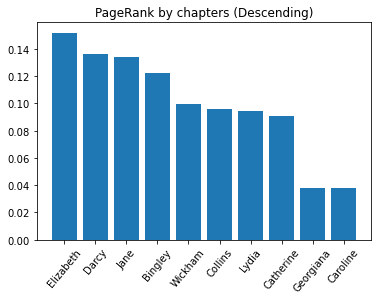

In [9]:
text_rank('chapters', cleaned_chapter)

     TextRank Occurrence Rank
1   Elizabeth       Elizabeth
2       Darcy           Darcy
3     Bingley         Bingley
4        Jane            Jane
5     Wickham         Wickham
6     Collins         Collins
7       Lydia           Lydia
8   Catherine       Catherine
9    Caroline        Caroline
10  Georgiana       Georgiana


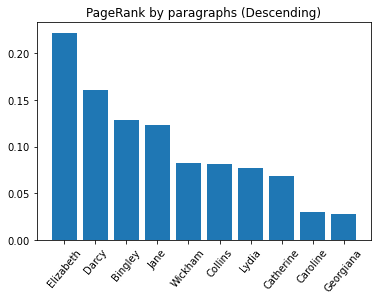

In [11]:
text_rank('paragraphs', cleaned_paragraph)

     TextRank Occurrence Rank
1   Elizabeth       Elizabeth
2       Darcy           Darcy
3     Bingley         Bingley
4        Jane            Jane
5     Wickham         Wickham
6     Collins         Collins
7       Lydia           Lydia
8   Catherine       Catherine
9    Caroline        Caroline
10  Georgiana       Georgiana


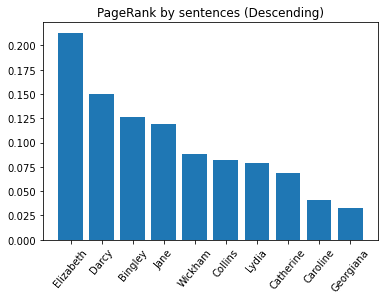

In [12]:
text_rank('sentences', cleaned_sentence)

----


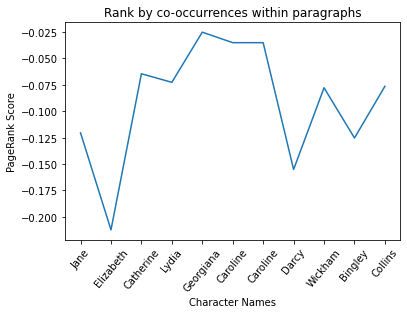

In [138]:
# Eigenvalue method
w,v = np.linalg.eig(P) #这里为啥用P就不对呢…… 奇了怪了 -P是对的？
x = np.arange(len(CHARACTER_LIST))
rank_eigen = v[:,0]/np.linalg.norm(v[:,0], ord = 1) 
plt.plot(x,rank_eigen)
plt.xticks(x, CHARACTER_LIST, rotation=50)
plt.xlabel('Character Names')
plt.ylabel('PageRank Score')
plt.title(f'Rank by co-occurrences within {section_name}')
plt.show()

## Named entity recognition (NER)
is probably the first step towards information extraction that seeks to locate and classify named entities in text into pre-defined categories such as the names of persons,

In [ ]:
from __future__ import print_function
import nltk
print(nltk.__version__)

## Gephi 可视化


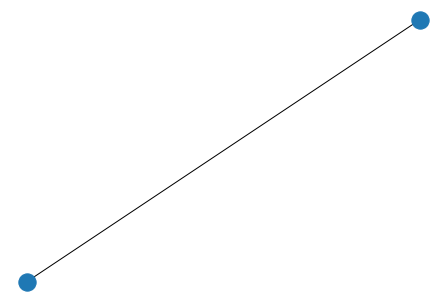

[1, 2]

In [11]:
import networkx as nx
G = nx.Graph() # 创建空图

G.add_node(1, time='5pm') # 添加节点，并赋节点属性
G.add_edge(1, 2, weight=4.7 ) # 添加边，并赋边属性

# 图显示需要借助matplotlib
import matplotlib.pyplot as plt

nx.draw(G) #绘制网络G
plt.show() # 在窗口中显示这幅图像
nx.write_gexf(G,'your_file_name.gexf') # 将图存为gexf文件，进而使用Gephi可视化


G._node # 节点及其属性的字典
G._adj # 节点及其邻居节点的字典
list(G.nodes()) # 节点列表

# 查找某一节点的邻居节点